In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
import pickle
from pprint import pprint
import pandas as pd

In [22]:
with open("D:/cleaned_data.pk", "rb") as f:
    data = pickle.load(f)
    
data.reset_index(drop=True, inplace=True)
print(data.head())
print(data.info())

         DATE  STAR         REVIEW  LIKE
0  2019-12-27     5  지역화폐 카드 신청 사용     8
1  2019-12-27     5            화이팅     4
2  2019-12-28     5  여기저기 사용 경제 도움     4
3  2019-12-28     5             혜택     5
4  2019-12-28     5          사용 혜택     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    2339 non-null   object
 1   STAR    2339 non-null   int64 
 2   REVIEW  2339 non-null   object
 3   LIKE    2339 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 73.2+ KB
None


In [23]:
##Date column을 pandas.Datetime으로 변환
data['DATE'] = pd.to_datetime(data['DATE'])
# Date column을 index로 설정
data = data.set_index("DATE")



In [24]:
## 4월을 기준으로 나누기
before_4 = data['2019-12-27' : '2021-03-31']
after_4 = data['2021-04-01': '2021-7-23']

In [25]:
# 확인해보기
print(before_4.info())
print(after_4.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1360 entries, 2019-12-27 to 2021-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STAR    1360 non-null   int64 
 1   REVIEW  1360 non-null   object
 2   LIKE    1360 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 42.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 979 entries, 2021-04-01 to 2021-07-23
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STAR    979 non-null    int64 
 1   REVIEW  979 non-null    object
 2   LIKE    979 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 30.6+ KB
None


In [26]:
## 나눈 시점부터 리뷰 가져오기
slice0 = [review for review in list(before_4['REVIEW'])]
slice1 = [review for review in list(after_4['REVIEW'])]

## 2.빈도분석

## 4월이전

In [27]:
# 전체 단어 분석을 위해 token들을 전부 모으기
import nltk

total_tokens = [token for doc in slice0 for token in doc.split()]
print(len(total_tokens))

6916


In [28]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

1190
[('사용', 397),
 ('카드', 223),
 ('충전', 180),
 ('오류', 142),
 ('접속', 134),
 ('결제', 132),
 ('업데이트', 120),
 ('확인', 108),
 ('실행', 96),
 ('네트워크', 92)]


In [29]:
!pip install wordcloud

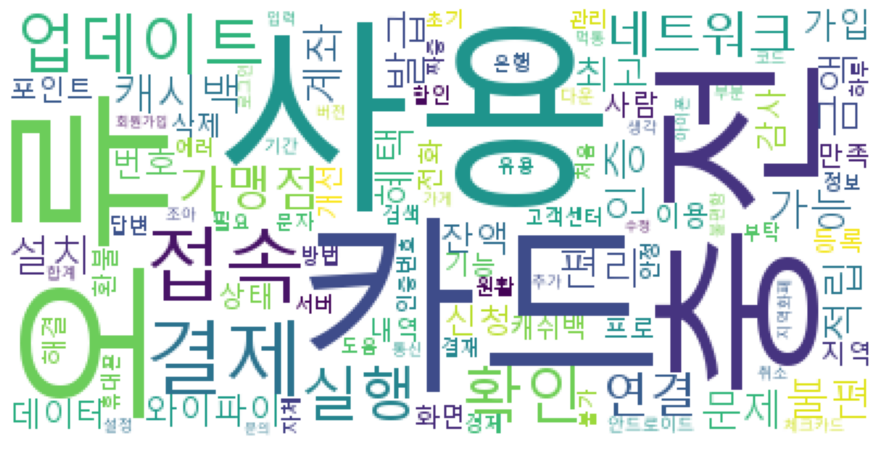

In [30]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                       stopwords=["''",",","[동백]"],
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 4월이후

In [31]:
# 전체 단어 분석을 위해 token들을 전부 모으기
import nltk

total_tokens = [token for doc in slice1 for token in doc.split()]
print(len(total_tokens))

9788


In [32]:
text = nltk.Text(total_tokens, name='NMSC')
print(len(set(text.tokens)))
pprint(text.vocab().most_common(10))

1420
[('카드', 664),
 ('사용', 511),
 ('발급', 296),
 ('불편', 264),
 ('기존', 249),
 ('금액', 166),
 ('가능', 148),
 ('충전', 144),
 ('이전', 134),
 ('등록', 123)]


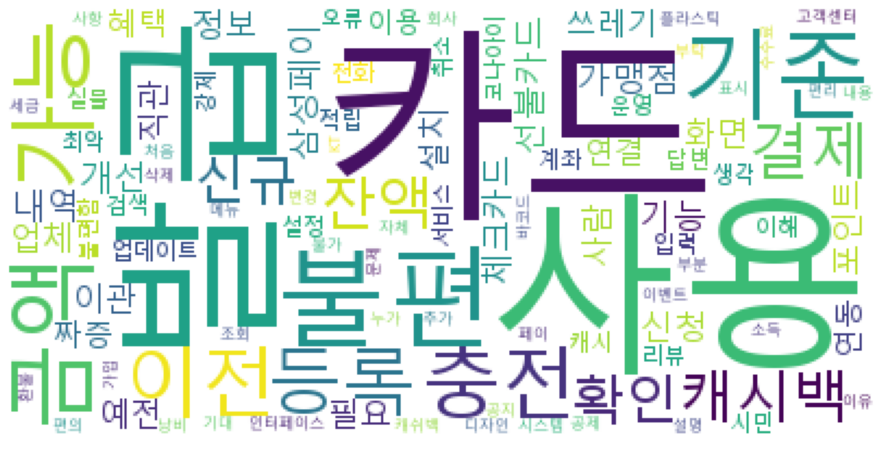

In [33]:
from wordcloud import WordCloud

wc = text.vocab().most_common(100)

# for win : font_path='c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                       stopwords=["''",",","[동백]"],
                      background_color='white',
                      ).generate_from_frequencies(dict(wc))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()